# Loading Data and Forming Predictive Model

In [7]:
import requests
import base64

CLIENT_ID_NUM = '4f61e8409ac3460aa559f9c30eba6850'
CLIENT_SECRET_NUM = '3551bf5bbc40404b8950cc35fb467e30'

client_credentials = f"{CLIENT_ID_NUM}:{CLIENT_SECRET_NUM}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

token_url = 'https://accounts.spotify.com/api/token'
headers = {'Authorization': f'Basic {client_credentials_base64.decode()}'}
data = {'grant_type': 'client_credentials'}
response = requests.post(token_url, data=data, headers=headers)

if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained.")
else:
    print("Error obtaining token.")
    exit()

Access token obtained.


In [8]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth

def obtain_playlist_data(playlist_id, access_token):
    spot = spotipy.Spotify(auth=access_token)
    playlist_agg = spot.playlist_tracks(playlist_id, fields='items(track(id, name, artists, album(id, name)))')

    # list of all the track info
    all_track_info = list()

    # get the track/album name, id, etc.
    for track_data in playlist_agg['items']:
        track = track_data['track']
        track_name = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album_name = track['album']['name']
        album_id = track['album']['id']
        track_id = track['id']

        audio_feat = None
        popularity = None

        # obtain the audio features
        try:
          if track_id is not None:
            audio_feat = spot.audio_features(track_id)[0]
        except Exception as e:
            print(f"Error retrieving audio features for track {track_name} (Track ID: {track_id}): {e}")

        # obtain the popularity data
        try:
            if track_id is not None:
                track_info = spot.track(track_id)
                popularity = track_info['popularity'] if track_info else None
        except:
            pass

        # create a dict to store data which we will eventually put into a data frame
        track_data = dict()
        track_data = {
            'Track Name': track_name,
            'Artists': artists,
            'Album Name': album_name,
            'Album ID': album_id,
            'Track ID': track_id,
            'Popularity': popularity,
            'Explicit': track_info.get('explicit', None) if track_info else None,
            'External URLs': track_info.get('external_urls', {}).get('spotify', None),
            'Danceability': audio_feat.get('danceability', None) if audio_feat else None,
            'Energy': audio_feat.get('energy', None) if audio_feat else None,
            'Speechiness': audio_feat.get('speechiness', None) if audio_feat else None,
            'Acousticness': audio_feat.get('acousticness', None) if audio_feat else None,
            'Instrumentalness': audio_feat.get('instrumentalness', None) if audio_feat else None,
            'Liveness': audio_feat.get('liveness', None) if audio_feat else None,
            'Valence': audio_feat.get('valence', None) if audio_feat else None,
            'Tempo': audio_feat.get('tempo', None) if audio_feat else None}

        all_track_info.append(track_data)

    df_track_info = pd.DataFrame(all_track_info)

    return df_track_info

In [9]:
# this is the training data
playlist_id = '5grvNhkcAbW8mng9DjKy3e'
df_track_info = obtain_playlist_data(playlist_id, access_token)

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7MXVkk9YMctZqd1Srtv4MB with Params: {} returned 403 due to None


Error retrieving audio features for track Starboy (Track ID: 7MXVkk9YMctZqd1Srtv4MB): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7MXVkk9YMctZqd1Srtv4MB:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4F7A0DXBrmUAkp32uenhZt with Params: {} returned 403 due to None


Error retrieving audio features for track Party Monster (Track ID: 4F7A0DXBrmUAkp32uenhZt): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4F7A0DXBrmUAkp32uenhZt:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=37F0uwRSrdzkBiuj0D5UHI with Params: {} returned 403 due to None


Error retrieving audio features for track Reminder (Track ID: 37F0uwRSrdzkBiuj0D5UHI): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=37F0uwRSrdzkBiuj0D5UHI:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4h90qkbnW1Qq6pBhoPvwko with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0ifooM33X1iBxVYyOkSbXW with Params: {} returned 403 due to None


Error retrieving audio features for track Sidewalks (Track ID: 4h90qkbnW1Qq6pBhoPvwko): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4h90qkbnW1Qq6pBhoPvwko:
 None, reason: None
Error retrieving audio features for track A Lonely Night (Track ID: 0ifooM33X1iBxVYyOkSbXW): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0ifooM33X1iBxVYyOkSbXW:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2Ch7LmS7r2Gy2kc64wv3Bz with Params: {} returned 403 due to None


Error retrieving audio features for track Die For You (Track ID: 2Ch7LmS7r2Gy2kc64wv3Bz): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2Ch7LmS7r2Gy2kc64wv3Bz:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4mU5iXHeLgbR94siF7p1sY with Params: {} returned 403 due to None


Error retrieving audio features for track Six Feet Under (Track ID: 4mU5iXHeLgbR94siF7p1sY): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4mU5iXHeLgbR94siF7p1sY:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3Te3gG6MPEDNqLGzWrjKC3 with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2vgUijXOTRMnWXDtvgMp2b with Params: {} returned 403 due to None


Error retrieving audio features for track Nothing Without You (Track ID: 3Te3gG6MPEDNqLGzWrjKC3): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3Te3gG6MPEDNqLGzWrjKC3:
 None, reason: None
Error retrieving audio features for track Take My Breath (Track ID: 2vgUijXOTRMnWXDtvgMp2b): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2vgUijXOTRMnWXDtvgMp2b:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2SLwbpExuoBDZBpjfefCtV with Params: {} returned 403 due to None


Error retrieving audio features for track Out of Time (Track ID: 2SLwbpExuoBDZBpjfefCtV): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2SLwbpExuoBDZBpjfefCtV:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0mL82sxCRjrs3br407IdJh with Params: {} returned 403 due to None


Error retrieving audio features for track Is There Someone Else? (Track ID: 0mL82sxCRjrs3br407IdJh): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0mL82sxCRjrs3br407IdJh:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1E5Xu8dur0fAjSP1VpVhAZ with Params: {} returned 403 due to None


Error retrieving audio features for track Best Friends (Track ID: 1E5Xu8dur0fAjSP1VpVhAZ): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1E5Xu8dur0fAjSP1VpVhAZ:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6a4GH1gljLL7VvmO9u5O92 with Params: {} returned 403 due to None


Error retrieving audio features for track Don’t Break My Heart (Track ID: 6a4GH1gljLL7VvmO9u5O92): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6a4GH1gljLL7VvmO9u5O92:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2D4dV2KXDTszzJ3p3cFqhA with Params: {} returned 403 due to None


Error retrieving audio features for track Less Than Zero (Track ID: 2D4dV2KXDTszzJ3p3cFqhA): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2D4dV2KXDTszzJ3p3cFqhA:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5XbA7TAqsD0fj0dGBrbb0D with Params: {} returned 403 due to None


Error retrieving audio features for track I Heard You’re Married (feat. Lil Wayne) (Track ID: 5XbA7TAqsD0fj0dGBrbb0D): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5XbA7TAqsD0fj0dGBrbb0D:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1nH2PkJL1XoUq8oE6tBZoU with Params: {} returned 403 due to None


Error retrieving audio features for track Sacrifice (Track ID: 1nH2PkJL1XoUq8oE6tBZoU): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1nH2PkJL1XoUq8oE6tBZoU:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6bnF93Rx87YqUBLSgjiMU8 with Params: {} returned 403 due to None


Error retrieving audio features for track Heartless (Track ID: 6bnF93Rx87YqUBLSgjiMU8): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6bnF93Rx87YqUBLSgjiMU8:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3orEOtd8CPL8GFlpRpKuoE with Params: {} returned 403 due to None


Error retrieving audio features for track Faith (Track ID: 3orEOtd8CPL8GFlpRpKuoE): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3orEOtd8CPL8GFlpRpKuoE:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5QO79kh1waicV47BqGRL3g with Params: {} returned 403 due to None


Error retrieving audio features for track Save Your Tears (Track ID: 5QO79kh1waicV47BqGRL3g): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5QO79kh1waicV47BqGRL3g:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0VjIjW4GlUZAMYd2vXMi3b with Params: {} returned 403 due to None


Error retrieving audio features for track Blinding Lights (Track ID: 0VjIjW4GlUZAMYd2vXMi3b): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0VjIjW4GlUZAMYd2vXMi3b:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4BGZF4oLbTL0pWm7C18pbv with Params: {} returned 403 due to None


Error retrieving audio features for track Scared To Live (Track ID: 4BGZF4oLbTL0pWm7C18pbv): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4BGZF4oLbTL0pWm7C18pbv:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6kWxIqQDsKFYCJGbU4AjCX with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2K9Ovn1o2bTGqbsABGC6m3 with Params: {} returned 403 due to None


Error retrieving audio features for track Hardest To Love (Track ID: 6kWxIqQDsKFYCJGbU4AjCX): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6kWxIqQDsKFYCJGbU4AjCX:
 None, reason: None
Error retrieving audio features for track Too Late (Track ID: 2K9Ovn1o2bTGqbsABGC6m3): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2K9Ovn1o2bTGqbsABGC6m3:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7szuecWAPwGoV1e5vGu8tl with Params: {} returned 403 due to None


Error retrieving audio features for track In Your Eyes (Track ID: 7szuecWAPwGoV1e5vGu8tl): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7szuecWAPwGoV1e5vGu8tl:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2p8IUWQDrpjuFltbdgLOag with Params: {} returned 403 due to None


Error retrieving audio features for track After Hours (Track ID: 2p8IUWQDrpjuFltbdgLOag): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2p8IUWQDrpjuFltbdgLOag:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4PhsKqMdgMEUSstTDAmMpg with Params: {} returned 403 due to None


Error retrieving audio features for track Often (Track ID: 4PhsKqMdgMEUSstTDAmMpg): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4PhsKqMdgMEUSstTDAmMpg:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7fBv7CLKzipRk6EC6TWHOB with Params: {} returned 403 due to None


Error retrieving audio features for track The Hills (Track ID: 7fBv7CLKzipRk6EC6TWHOB): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7fBv7CLKzipRk6EC6TWHOB:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=22VdIZQfgXJea34mQxlt81 with Params: {} returned 403 due to None


Error retrieving audio features for track Can't Feel My Face (Track ID: 22VdIZQfgXJea34mQxlt81): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=22VdIZQfgXJea34mQxlt81:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=50iiDJGpAPdr2VTrz999XA with Params: {} returned 403 due to None


Error retrieving audio features for track House Of Balloons / Glass Table Girls (Track ID: 50iiDJGpAPdr2VTrz999XA): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=50iiDJGpAPdr2VTrz999XA:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6u0dQik0aif7FQlrhycG1L with Params: {} returned 403 due to None


Error retrieving audio features for track The Morning (Track ID: 6u0dQik0aif7FQlrhycG1L): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6u0dQik0aif7FQlrhycG1L:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0dcf0L6F1LUA1nE2zWH4J2 with Params: {} returned 403 due to None


Error retrieving audio features for track The Party & The After Party (Track ID: 0dcf0L6F1LUA1nE2zWH4J2): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0dcf0L6F1LUA1nE2zWH4J2:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1FJrsh1NbV9eRw5JQt3M4e with Params: {} returned 403 due to None


Error retrieving audio features for track Twenty Eight (Track ID: 1FJrsh1NbV9eRw5JQt3M4e): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1FJrsh1NbV9eRw5JQt3M4e:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0p3sSUXDohjddeKlnvGbCD with Params: {} returned 403 due to None


Error retrieving audio features for track Lonely Star (Track ID: 0p3sSUXDohjddeKlnvGbCD): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0p3sSUXDohjddeKlnvGbCD:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4fiYSa6ln7h0scprgNEs0g with Params: {} returned 403 due to None


Error retrieving audio features for track Thursday (Track ID: 4fiYSa6ln7h0scprgNEs0g): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4fiYSa6ln7h0scprgNEs0g:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=46X8c9qJzpBLYcos3OX0CE with Params: {} returned 403 due to None


Error retrieving audio features for track The Zone (Track ID: 46X8c9qJzpBLYcos3OX0CE): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=46X8c9qJzpBLYcos3OX0CE:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=29fTi7Tdh9CiU8HuVDaqVY with Params: {} returned 403 due to None


Error retrieving audio features for track Rolling Stone (Track ID: 29fTi7Tdh9CiU8HuVDaqVY): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=29fTi7Tdh9CiU8HuVDaqVY:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3hDnFYwpnY0wONZDkYxUsj with Params: {} returned 403 due to None


Error retrieving audio features for track Heaven Or Las Vegas (Track ID: 3hDnFYwpnY0wONZDkYxUsj): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3hDnFYwpnY0wONZDkYxUsj:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4fLnXd56RsWN4ZBtb9TegQ with Params: {} returned 403 due to None


Error retrieving audio features for track Valerie (Track ID: 4fLnXd56RsWN4ZBtb9TegQ): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4fLnXd56RsWN4ZBtb9TegQ:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7eZ7ODAt9cALYnWLO8F6Fd with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6fRgjqJptZry7fipP2Beyh with Params: {} returned 403 due to None


Error retrieving audio features for track D.D. (Track ID: 7eZ7ODAt9cALYnWLO8F6Fd): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7eZ7ODAt9cALYnWLO8F6Fd:
 None, reason: None
Error retrieving audio features for track Montreal (Track ID: 6fRgjqJptZry7fipP2Beyh): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6fRgjqJptZry7fipP2Beyh:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1yhDPgIPGoe3Bf8wRsK4u7 with Params: {} returned 403 due to None


Error retrieving audio features for track Outside (Track ID: 1yhDPgIPGoe3Bf8wRsK4u7): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1yhDPgIPGoe3Bf8wRsK4u7:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0C5WrEPjUYPxVkKyth1Lbz with Params: {} returned 403 due to None


Error retrieving audio features for track XO / The Host (Track ID: 0C5WrEPjUYPxVkKyth1Lbz): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0C5WrEPjUYPxVkKyth1Lbz:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3Dt75NjLThmoBTp5wQC7g7 with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4m0KaNb0ClCOvgThd2Gv2b with Params: {} returned 403 due to None


Error retrieving audio features for track Same Old Song (Track ID: 3Dt75NjLThmoBTp5wQC7g7): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3Dt75NjLThmoBTp5wQC7g7:
 None, reason: None
Error retrieving audio features for track Next (Track ID: 4m0KaNb0ClCOvgThd2Gv2b): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4m0KaNb0ClCOvgThd2Gv2b:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6Rqe6ghJ6t9SlQ2pRrt5tI with Params: {} returned 403 due to None


Error retrieving audio features for track Till Dawn (Here Comes The Sun) (Track ID: 6Rqe6ghJ6t9SlQ2pRrt5tI): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6Rqe6ghJ6t9SlQ2pRrt5tI:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7xqANDRz8JFxkwfY65WISy with Params: {} returned 403 due to None


Error retrieving audio features for track Loft Music (Track ID: 7xqANDRz8JFxkwfY65WISy): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7xqANDRz8JFxkwfY65WISy:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6VwBbL8CzPiC4QV66ay7oR with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=44I7sqKYCAa7bQdVywkShO with Params: {} returned 403 due to None


Error retrieving audio features for track Wicked Games (Track ID: 6VwBbL8CzPiC4QV66ay7oR): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6VwBbL8CzPiC4QV66ay7oR:
 None, reason: None
Error retrieving audio features for track Hurricane (Track ID: 44I7sqKYCAa7bQdVywkShO): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=44I7sqKYCAa7bQdVywkShO:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=20MuVazoNMv6xjKPnRFOxG with Params: {} returned 403 due to None


Error retrieving audio features for track WAKE UP (Track ID: 20MuVazoNMv6xjKPnRFOxG): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=20MuVazoNMv6xjKPnRFOxG:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=09mEdoA6zrmBPgTEN5qXmN with Params: {} returned 403 due to None


Error retrieving audio features for track Call Out My Name (Track ID: 09mEdoA6zrmBPgTEN5qXmN): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=09mEdoA6zrmBPgTEN5qXmN:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4ppTAJUbNXELZcoUaL90wo with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2Ghp894n1laIf2w98VeAOJ with Params: {} returned 403 due to None


Error retrieving audio features for track Try Me (Track ID: 4ppTAJUbNXELZcoUaL90wo): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4ppTAJUbNXELZcoUaL90wo:
 None, reason: None
Error retrieving audio features for track How Do I Make You Love Me? (Track ID: 2Ghp894n1laIf2w98VeAOJ): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2Ghp894n1laIf2w98VeAOJ:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1B87ZDrD3Pno9hS4stamWO with Params: {} returned 403 due to None


Error retrieving audio features for track Comin Out Strong (feat. The Weeknd) (Track ID: 1B87ZDrD3Pno9hS4stamWO): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1B87ZDrD3Pno9hS4stamWO:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6C6fHTuFUxVtJpBOOaMvJr with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7EiZI6JVHllARrX9PUvAdX with Params: {} returned 403 due to None


Error retrieving audio features for track Shameless (Track ID: 6C6fHTuFUxVtJpBOOaMvJr): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6C6fHTuFUxVtJpBOOaMvJr:
 None, reason: None
Error retrieving audio features for track Low Life (feat. The Weeknd) (Track ID: 7EiZI6JVHllARrX9PUvAdX): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7EiZI6JVHllARrX9PUvAdX:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1cKHdTo9u0ZymJdPGSh6nq with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0Nwar8rweBUyfyuoyjjUvk with Params: {} returned 403 due to None


Error retrieving audio features for track I Was Never There (Track ID: 1cKHdTo9u0ZymJdPGSh6nq): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1cKHdTo9u0ZymJdPGSh6nq:
 None, reason: None
Error retrieving audio features for track Privilege (Track ID: 0Nwar8rweBUyfyuoyjjUvk): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0Nwar8rweBUyfyuoyjjUvk:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4hqOmrCCJKyiuwDexd8c2t with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=64BuLY7ggczC17w5LSUlSE with Params: {} returned 403 due to None


Error retrieving audio features for track Price On My Head (feat. The Weeknd) (Track ID: 4hqOmrCCJKyiuwDexd8c2t): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4hqOmrCCJKyiuwDexd8c2t:
 None, reason: None
Error retrieving audio features for track Creepin' (with The Weeknd & 21 Savage) (Track ID: 64BuLY7ggczC17w5LSUlSE): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=64BuLY7ggczC17w5LSUlSE:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6MtAyBxdZ2VFOk7vTRvb86 with Params: {} returned 403 due to None


Error retrieving audio features for track Enemy (Track ID: 6MtAyBxdZ2VFOk7vTRvb86): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6MtAyBxdZ2VFOk7vTRvb86:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5SF1kcOiOmtZFUIQNGC4TC with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2yYDijitHN6psA2tH0ndXs with Params: {} returned 403 due to None


Error retrieving audio features for track The Birds Pt. 1 (Track ID: 5SF1kcOiOmtZFUIQNGC4TC): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5SF1kcOiOmtZFUIQNGC4TC:
 None, reason: None
Error retrieving audio features for track The Birds Pt. 2 (Track ID: 2yYDijitHN6psA2tH0ndXs): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2yYDijitHN6psA2tH0ndXs:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7xgYvziLsxNd0UznaEw8Oi with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3PHmIGGAltIV30QyB1UplA with Params: {} returned 403 due to None


Error retrieving audio features for track Gone (Track ID: 7xgYvziLsxNd0UznaEw8Oi): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7xgYvziLsxNd0UznaEw8Oi:
 None, reason: None
Error retrieving audio features for track Trust Issues (Track ID: 3PHmIGGAltIV30QyB1UplA): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3PHmIGGAltIV30QyB1UplA:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3dhjNA0jGA8vHBQ1VdD6vV with Params: {} returned 403 due to None


Error retrieving audio features for track I Feel It Coming (Track ID: 3dhjNA0jGA8vHBQ1VdD6vV): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3dhjNA0jGA8vHBQ1VdD6vV:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6eJbjaoLRlfwrfWpeS6alF with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6utQlfLooYsUkq5xUg3vxt with Params: {} returned 403 due to None


Error retrieving audio features for track Life Of The Party (Track ID: 6eJbjaoLRlfwrfWpeS6alF): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6eJbjaoLRlfwrfWpeS6alF:
 None, reason: None
Error retrieving audio features for track Nothing Compares - Bonus Track (Track ID: 6utQlfLooYsUkq5xUg3vxt): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6utQlfLooYsUkq5xUg3vxt:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6tjsbysvZh8Pq8DZA5ldrn with Params: {} returned 403 due to None


Error retrieving audio features for track The Knowing (Track ID: 6tjsbysvZh8Pq8DZA5ldrn): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6tjsbysvZh8Pq8DZA5ldrn:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2dJ4rGtsOHOgvTQawsCRtg with Params: {} returned 403 due to None


Error retrieving audio features for track Pray 4 Love (feat. The Weeknd) (Track ID: 2dJ4rGtsOHOgvTQawsCRtg): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2dJ4rGtsOHOgvTQawsCRtg:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6huNf4dutXRjJyGn7f5BPS with Params: {} returned 403 due to None


Error retrieving audio features for track Pray For Me (Track ID: 6huNf4dutXRjJyGn7f5BPS): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6huNf4dutXRjJyGn7f5BPS:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6q4EtrwC14rUa98NhI0vKx with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7t2bFihaDvhIrd2gn2CWJO with Params: {} returned 403 due to None


Error retrieving audio features for track Make It (feat. The Weeknd) [DJAmg Remixer] (Track ID: 6q4EtrwC14rUa98NhI0vKx): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6q4EtrwC14rUa98NhI0vKx:
 None, reason: None
Error retrieving audio features for track Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mustard) - Remix (Track ID: 7t2bFihaDvhIrd2gn2CWJO): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7t2bFihaDvhIrd2gn2CWJO:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6QdnKD1zwEgyOWtkrdzlOF with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6b5P51m8xx2XA6U7sdNZ5E with Params: {} returned 403 due to None


Error retrieving audio features for track Hurt You (Track ID: 6QdnKD1zwEgyOWtkrdzlOF): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6QdnKD1zwEgyOWtkrdzlOF:
 None, reason: None
Error retrieving audio features for track Alone Again (Track ID: 6b5P51m8xx2XA6U7sdNZ5E): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6b5P51m8xx2XA6U7sdNZ5E:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5ViIbEgXhDBsLEapDKISRC with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7kfOEMJBJwdCYqyJeEnNhr with Params: {} returned 403 due to None


Error retrieving audio features for track High For This (Track ID: 5ViIbEgXhDBsLEapDKISRC): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5ViIbEgXhDBsLEapDKISRC:
 None, reason: None
Error retrieving audio features for track Moth To A Flame (with The Weeknd) (Track ID: 7kfOEMJBJwdCYqyJeEnNhr): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7kfOEMJBJwdCYqyJeEnNhr:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5J4ZkQpzMUFojo1CtAZYpn with Params: {} returned 403 due to None


Error retrieving audio features for track Love Me Harder (Track ID: 5J4ZkQpzMUFojo1CtAZYpn): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5J4ZkQpzMUFojo1CtAZYpn:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4VMRsbfZzd3SfQtaJ1Wpwi with Params: {} returned 403 due to None


Error retrieving audio features for track Double Fantasy (with Future) (Track ID: 4VMRsbfZzd3SfQtaJ1Wpwi): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4VMRsbfZzd3SfQtaJ1Wpwi:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6NMtzpDQBTOfJwMzgMX0zl with Params: {} returned 403 due to None


Error retrieving audio features for track SKELETONS (Track ID: 6NMtzpDQBTOfJwMzgMX0zl): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6NMtzpDQBTOfJwMzgMX0zl:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5xP9lQYA8YQmQh6BOxcAnR with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6cViXqp01e3FrAaseuiSAV with Params: {} returned 403 due to None


Error retrieving audio features for track Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series) (Track ID: 5xP9lQYA8YQmQh6BOxcAnR): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5xP9lQYA8YQmQh6BOxcAnR:
 None, reason: None
Error retrieving audio features for track False Idols (with Lil Baby, Suzanna Son) (Track ID: 6cViXqp01e3FrAaseuiSAV): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6cViXqp01e3FrAaseuiSAV:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6QZePG40wT3i7bIRlmauTm with Params: {} returned 403 due to None


Error retrieving audio features for track Take Me Back (Track ID: 6QZePG40wT3i7bIRlmauTm): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6QZePG40wT3i7bIRlmauTm:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1NhjYYcYTRywc0di98xHxf with Params: {} returned 403 due to None


Error retrieving audio features for track Here We Go… Again (feat. Tyler, the Creator) (Track ID: 1NhjYYcYTRywc0di98xHxf): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1NhjYYcYTRywc0di98xHxf:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1sOW4PuG5X3Ie3EXUhAopJ with Params: {} returned 403 due to None


Error retrieving audio features for track Escape From LA (Track ID: 1sOW4PuG5X3Ie3EXUhAopJ): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1sOW4PuG5X3Ie3EXUhAopJ:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7lsYGc5H5DHktxO7gbB8bN with Params: {} returned 403 due to None


Error retrieving audio features for track Ordinary Life (Track ID: 7lsYGc5H5DHktxO7gbB8bN): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7lsYGc5H5DHktxO7gbB8bN:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6wQlQrTY5mVS8EGaFZVwVF with Params: {} returned 403 due to None


Error retrieving audio features for track Smile (with The Weeknd) (Track ID: 6wQlQrTY5mVS8EGaFZVwVF): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6wQlQrTY5mVS8EGaFZVwVF:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=30Zcjs7pgEkmJA1lEbGSWT with Params: {} returned 403 due to None


Error retrieving audio features for track FML (Track ID: 30Zcjs7pgEkmJA1lEbGSWT): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=30Zcjs7pgEkmJA1lEbGSWT:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5L3ecxQnQ9qTBmnLQiwf0C with Params: {} returned 403 due to None


Error retrieving audio features for track K-POP (Track ID: 5L3ecxQnQ9qTBmnLQiwf0C): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5L3ecxQnQ9qTBmnLQiwf0C:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4oeaIftdpT3JuZLcCkKmVE with Params: {} returned 403 due to None


Error retrieving audio features for track False Alarm (Track ID: 4oeaIftdpT3JuZLcCkKmVE): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4oeaIftdpT3JuZLcCkKmVE:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=36YCdzT57us0LhDmCYtrNE with Params: {} returned 403 due to None


Error retrieving audio features for track Rockin’ (Track ID: 36YCdzT57us0LhDmCYtrNE): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=36YCdzT57us0LhDmCYtrNE:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6pDVjCUA3B1vg9waKutAsv with Params: {} returned 403 due to None


Error retrieving audio features for track Attention (Track ID: 6pDVjCUA3B1vg9waKutAsv): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6pDVjCUA3B1vg9waKutAsv:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=03j354P848KtNU2FVSwkDG with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1bAvtmTl0F9loyz9AwPwp7 with Params: {} returned 403 due to None


Error retrieving audio features for track Real Life (Track ID: 03j354P848KtNU2FVSwkDG): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=03j354P848KtNU2FVSwkDG:
 None, reason: None
Error retrieving audio features for track Losers (Track ID: 1bAvtmTl0F9loyz9AwPwp7): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1bAvtmTl0F9loyz9AwPwp7:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1mhVXWduD8ReDwusfaHNwU with Params: {} returned 403 due to None


Error retrieving audio features for track Tell Your Friends (Track ID: 1mhVXWduD8ReDwusfaHNwU): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1mhVXWduD8ReDwusfaHNwU:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7uJH0YdSZL6psjxI6Xy08b with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3QWENKFYGEgp3itgTnrgq9 with Params: {} returned 403 due to None


Error retrieving audio features for track Acquainted (Track ID: 7uJH0YdSZL6psjxI6Xy08b): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7uJH0YdSZL6psjxI6Xy08b:
 None, reason: None
Error retrieving audio features for track Initiation (Track ID: 3QWENKFYGEgp3itgTnrgq9): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3QWENKFYGEgp3itgTnrgq9:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3OxL6MuctgZp1e0zxoAZhH with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3dQEShIMs5TW8H3eUh11r7 with Params: {} returned 403 due to None


Error retrieving audio features for track Young Metro (Track ID: 3OxL6MuctgZp1e0zxoAZhH): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3OxL6MuctgZp1e0zxoAZhH:
 None, reason: None
Error retrieving audio features for track Twenty Eight (Track ID: 3dQEShIMs5TW8H3eUh11r7): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3dQEShIMs5TW8H3eUh11r7:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5ZicFGBDAi9J2YCVesboUp with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7HLn9FW7A3XPb5JVYN1090 with Params: {} returned 403 due to None


Error retrieving audio features for track Professional (Track ID: 5ZicFGBDAi9J2YCVesboUp): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5ZicFGBDAi9J2YCVesboUp:
 None, reason: None
Error retrieving audio features for track Dancing In The Flames - Live from São Paulo (Track ID: 7HLn9FW7A3XPb5JVYN1090): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7HLn9FW7A3XPb5JVYN1090:
 None, reason: None


In [4]:
# this is the sample data
playlist_id_new = '1HngiyQ1VuGJsHyEVWytHX'
df_track_new = obtain_playlist_data(playlist_id_new, access_token)

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3xKsf9qdS1CyvXSMEid6g8 with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4QhWbupniDd44EDtnh2bFJ with Params: {} returned 403 due to None


Error retrieving audio features for track Pink + White (Track ID: 3xKsf9qdS1CyvXSMEid6g8): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3xKsf9qdS1CyvXSMEid6g8:
 None, reason: None
Error retrieving audio features for track Pyramids (Track ID: 4QhWbupniDd44EDtnh2bFJ): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4QhWbupniDd44EDtnh2bFJ:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0725YWm6Z0TpZ6wrNk64Eb with Params: {} returned 403 due to None


Error retrieving audio features for track Super Rich Kids (Track ID: 0725YWm6Z0TpZ6wrNk64Eb): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0725YWm6Z0TpZ6wrNk64Eb:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0GROiXm03OrMC5ltXLhGIu with Params: {} returned 403 due to None


Error retrieving audio features for track The Party & The After Party (Track ID: 0GROiXm03OrMC5ltXLhGIu): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0GROiXm03OrMC5ltXLhGIu:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2r7BPog74oaTG5shNYiUnV with Params: {} returned 403 due to None


Error retrieving audio features for track House Of Balloons / Glass Table Girls (Track ID: 2r7BPog74oaTG5shNYiUnV): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2r7BPog74oaTG5shNYiUnV:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1NhjYYcYTRywc0di98xHxf with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4YZbVct8l9MnAVIROnLQdx with Params: {} returned 403 due to None


Error retrieving audio features for track Here We Go… Again (feat. Tyler, the Creator) (Track ID: 1NhjYYcYTRywc0di98xHxf): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1NhjYYcYTRywc0di98xHxf:
 None, reason: None
Error retrieving audio features for track Forrest Gump (Track ID: 4YZbVct8l9MnAVIROnLQdx): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4YZbVct8l9MnAVIROnLQdx:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4osgfFTICMkcGbbigdsa53 with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2LMkwUfqC6S6s6qDVlEuzV with Params: {} returned 403 due to None


Error retrieving audio features for track Novacane (Track ID: 4osgfFTICMkcGbbigdsa53): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4osgfFTICMkcGbbigdsa53:
 None, reason: None
Error retrieving audio features for track White Ferrari (Track ID: 2LMkwUfqC6S6s6qDVlEuzV): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2LMkwUfqC6S6s6qDVlEuzV:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3s7MCdXyWmwjdcWh7GWXas with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1UGD3lW3tDmgZfAVDh6w7r with Params: {} returned 403 due to None


Error retrieving audio features for track Violent Crimes (Track ID: 3s7MCdXyWmwjdcWh7GWXas): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3s7MCdXyWmwjdcWh7GWXas:
 None, reason: None
Error retrieving audio features for track Devil In A New Dress (Track ID: 1UGD3lW3tDmgZfAVDh6w7r): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1UGD3lW3tDmgZfAVDh6w7r:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7rbECVPkY5UODxoOUVKZnA with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2D4dV2KXDTszzJ3p3cFqhA with Params: {} returned 403 due to None


Error retrieving audio features for track I Wonder (Track ID: 7rbECVPkY5UODxoOUVKZnA): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7rbECVPkY5UODxoOUVKZnA:
 None, reason: None
Error retrieving audio features for track Less Than Zero (Track ID: 2D4dV2KXDTszzJ3p3cFqhA): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2D4dV2KXDTszzJ3p3cFqhA:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6GGmABM6AMwMzEhK7szqJT with Params: {} returned 403 due to None


Error retrieving audio features for track Pink Dolphin Sunset (feat. Tee) (Track ID: 6GGmABM6AMwMzEhK7szqJT): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6GGmABM6AMwMzEhK7szqJT:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6NMtzpDQBTOfJwMzgMX0zl with Params: {} returned 403 due to None


Error retrieving audio features for track SKELETONS (Track ID: 6NMtzpDQBTOfJwMzgMX0zl): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6NMtzpDQBTOfJwMzgMX0zl:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=51EC3I1nQXpec4gDk0mQyP with Params: {} returned 403 due to None


Error retrieving audio features for track 90210 (feat. Kacy Hill) (Track ID: 51EC3I1nQXpec4gDk0mQyP): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=51EC3I1nQXpec4gDk0mQyP:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1eQBEelI2NCy7AUTerX0KS with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2qTzVCeWC2OY28r7gHagAa with Params: {} returned 403 due to None


Error retrieving audio features for track Ultralight Beam (Track ID: 1eQBEelI2NCy7AUTerX0KS): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1eQBEelI2NCy7AUTerX0KS:
 None, reason: None
Error retrieving audio features for track Patience (feat. Don Toliver) (Track ID: 2qTzVCeWC2OY28r7gHagAa): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2qTzVCeWC2OY28r7gHagAa:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3mHO1J6kfiArjBo1zhLFGP with Params: {} returned 403 due to None


Error retrieving audio features for track Coming Down (Track ID: 3mHO1J6kfiArjBo1zhLFGP): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3mHO1J6kfiArjBo1zhLFGP:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=634tM1Us7Z6bsbZhRbrRr2 with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=53qYItjefG5SUf62428dIw with Params: {} returned 403 due to None


Error retrieving audio features for track Kiss Land (Track ID: 634tM1Us7Z6bsbZhRbrRr2): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=634tM1Us7Z6bsbZhRbrRr2:
 None, reason: None
Error retrieving audio features for track The Zone (Track ID: 53qYItjefG5SUf62428dIw): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=53qYItjefG5SUf62428dIw:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2Gyc6e2cLxA5hoX1NOvYnU with Params: {} returned 403 due to None


Error retrieving audio features for track Say It (Track ID: 2Gyc6e2cLxA5hoX1NOvYnU): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2Gyc6e2cLxA5hoX1NOvYnU:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2qlBAT108lYOzlXhBxBqEv with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2pMPWE7PJH1PizfgGRMnR9 with Params: {} returned 403 due to None


Error retrieving audio features for track Home (Metro Boomin & Don Toliver, Lil Uzi Vert) (Track ID: 2qlBAT108lYOzlXhBxBqEv): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2qlBAT108lYOzlXhBxBqEv:
 None, reason: None
Error retrieving audio features for track Bad Religion (Track ID: 2pMPWE7PJH1PizfgGRMnR9): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2pMPWE7PJH1PizfgGRMnR9:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6C6fHTuFUxVtJpBOOaMvJr with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5lcyIeEfwZTs8Ajw3kdF7P with Params: {} returned 403 due to None


Error retrieving audio features for track Shameless (Track ID: 6C6fHTuFUxVtJpBOOaMvJr): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6C6fHTuFUxVtJpBOOaMvJr:
 None, reason: None
Error retrieving audio features for track Crack Rock (Track ID: 5lcyIeEfwZTs8Ajw3kdF7P): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5lcyIeEfwZTs8Ajw3kdF7P:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=49sXkAcR5LvOrtq5Qcn5cf with Params: {} returned 403 due to None


Error retrieving audio features for track Superpower (feat. Frank Ocean) (Track ID: 49sXkAcR5LvOrtq5Qcn5cf): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=49sXkAcR5LvOrtq5Qcn5cf:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5GUYJTQap5F3RDQiCOJhrS with Params: {} returned 403 due to None


Error retrieving audio features for track Self Control (Track ID: 5GUYJTQap5F3RDQiCOJhrS): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5GUYJTQap5F3RDQiCOJhrS:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1fOkmYW3ZFkkjIdOZSf596 with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2q0VexHJirnUPnEOhr2DxK with Params: {} returned 403 due to None


Error retrieving audio features for track Pink Matter (Track ID: 1fOkmYW3ZFkkjIdOZSf596): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1fOkmYW3ZFkkjIdOZSf596:
 None, reason: None
Error retrieving audio features for track Biking (Track ID: 2q0VexHJirnUPnEOhr2DxK): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2q0VexHJirnUPnEOhr2DxK:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6vnfObZ4Ys70SBAtti1xZ9 with Params: {} returned 403 due to None


Error retrieving audio features for track COFFEE BEAN (Track ID: 6vnfObZ4Ys70SBAtti1xZ9): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6vnfObZ4Ys70SBAtti1xZ9:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0xXGklgPEKlLdXNEuucFPY with Params: {} returned 403 due to None


Error retrieving audio features for track Driving to Hawaii - Juniper Version (Track ID: 0xXGklgPEKlLdXNEuucFPY): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0xXGklgPEKlLdXNEuucFPY:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0HAqq2GcQKyi3s87GuN7jU with Params: {} returned 403 due to None


Error retrieving audio features for track Amoeba (Track ID: 0HAqq2GcQKyi3s87GuN7jU): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0HAqq2GcQKyi3s87GuN7jU:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5wTVNpi5WDByxBgKgUE6MU with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=593W4qZOwwdqF6YnimJjL6 with Params: {} returned 403 due to None


Error retrieving audio features for track Supermodel (Track ID: 5wTVNpi5WDByxBgKgUE6MU): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5wTVNpi5WDByxBgKgUE6MU:
 None, reason: None
Error retrieving audio features for track Doves In The Wind (feat. Kendrick Lamar) (Track ID: 593W4qZOwwdqF6YnimJjL6): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=593W4qZOwwdqF6YnimJjL6:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0q75NwOoFiARAVp4EXU4Bs with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=06u5LrUpbosQlQ1QJFhPpG with Params: {} returned 403 due to None


Error retrieving audio features for track Love Galore (feat. Travis Scott) (Track ID: 0q75NwOoFiARAVp4EXU4Bs): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0q75NwOoFiARAVp4EXU4Bs:
 None, reason: None
Error retrieving audio features for track Drew Barrymore (Track ID: 06u5LrUpbosQlQ1QJFhPpG): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=06u5LrUpbosQlQ1QJFhPpG:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5yvhdo8FXbBsIllxv2Rr94 with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6gU9OKjOE7ghfEd55oRO57 with Params: {} returned 403 due to None


Error retrieving audio features for track Prom (Track ID: 5yvhdo8FXbBsIllxv2Rr94): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5yvhdo8FXbBsIllxv2Rr94:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7eqoqGkKwgOaWNNHx90uEZ with Params: {} returned 403 due to None


Error retrieving audio features for track The Weekend (Track ID: 6gU9OKjOE7ghfEd55oRO57): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6gU9OKjOE7ghfEd55oRO57:
 None, reason: None
Error retrieving audio features for track Nights (Track ID: 7eqoqGkKwgOaWNNHx90uEZ): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7eqoqGkKwgOaWNNHx90uEZ:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2ZWlPOoWh0626oTaHrnl2a with Params: {} returned 403 due to None


Error retrieving audio features for track Ivy (Track ID: 2ZWlPOoWh0626oTaHrnl2a): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2ZWlPOoWh0626oTaHrnl2a:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5mCPDVBb16L4XQwDdbRUpz with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4Wjhj0WjkyECccfHVIgaTq with Params: {} returned 403 due to None


Error retrieving audio features for track Passionfruit (Track ID: 5mCPDVBb16L4XQwDdbRUpz): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5mCPDVBb16L4XQwDdbRUpz:
 None, reason: None
Error retrieving audio features for track Trust Issues (Track ID: 4Wjhj0WjkyECccfHVIgaTq): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4Wjhj0WjkyECccfHVIgaTq:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3XLSlQLJf3Ut0zvMUxnF1h with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6Vmow8PuUaU7W1T2WWLZk2 with Params: {} returned 403 due to None


Error retrieving audio features for track Houstatlantavegas (Track ID: 3XLSlQLJf3Ut0zvMUxnF1h): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3XLSlQLJf3Ut0zvMUxnF1h:
 None, reason: None
Error retrieving audio features for track Go Gina (Track ID: 6Vmow8PuUaU7W1T2WWLZk2): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6Vmow8PuUaU7W1T2WWLZk2:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3OHfY25tqY28d16oZczHc8 with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1boXOL0ua7N2iCOUVI1p9F with Params: {} returned 403 due to None


Error retrieving audio features for track Kill Bill (Track ID: 3OHfY25tqY28d16oZczHc8): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3OHfY25tqY28d16oZczHc8:
 None, reason: None
Error retrieving audio features for track Japanese Denim (Track ID: 1boXOL0ua7N2iCOUVI1p9F): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1boXOL0ua7N2iCOUVI1p9F:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=19woxaSpjOefa2JnAOoqW5 with Params: {} returned 403 due to None


Error retrieving audio features for track Garden (Say It Like Dat) (Track ID: 19woxaSpjOefa2JnAOoqW5): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=19woxaSpjOefa2JnAOoqW5:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5pFFnDmAEzBnorhyKIZwer with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5H4ytJ5KQGg6f7uWYEnZ3T with Params: {} returned 403 due to None


Error retrieving audio features for track Tiny Dancer - Remastered 2016 (Track ID: 5pFFnDmAEzBnorhyKIZwer): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5pFFnDmAEzBnorhyKIZwer:
 None, reason: None
Error retrieving audio features for track Till Dawn (Here Comes The Sun) (Track ID: 5H4ytJ5KQGg6f7uWYEnZ3T): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5H4ytJ5KQGg6f7uWYEnZ3T:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5fQBa4wkmq28xpSLOQ202K with Params: {} returned 403 due to None


Error retrieving audio features for track Normal Girl (Track ID: 5fQBa4wkmq28xpSLOQ202K): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5fQBa4wkmq28xpSLOQ202K:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0Hs5enNuaAXmJssAybWbOw with Params: {} returned 403 due to None


Error retrieving audio features for track XO / The Host (Track ID: 0Hs5enNuaAXmJssAybWbOw): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0Hs5enNuaAXmJssAybWbOw:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2yYDijitHN6psA2tH0ndXs with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4gh0ZnHzaTMT1sDga7Ek0N with Params: {} returned 403 due to None


Error retrieving audio features for track The Birds Pt. 2 (Track ID: 2yYDijitHN6psA2tH0ndXs): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2yYDijitHN6psA2tH0ndXs:
 None, reason: None
Error retrieving audio features for track sdp interlude (Track ID: 4gh0ZnHzaTMT1sDga7Ek0N): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4gh0ZnHzaTMT1sDga7Ek0N:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4jBfUB4kQJCWOrjGLQqhO0 with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4h6ViRoztTBpWcJ1zFT9Zg with Params: {} returned 403 due to None


Error retrieving audio features for track The Morning (Track ID: 4jBfUB4kQJCWOrjGLQqhO0): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4jBfUB4kQJCWOrjGLQqhO0:
 None, reason: None
Error retrieving audio features for track 20 Something (Track ID: 4h6ViRoztTBpWcJ1zFT9Zg): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4h6ViRoztTBpWcJ1zFT9Zg:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7HnkUNPrhRurdGEm9nRYFH with Params: {} returned 403 due to None


Error retrieving audio features for track Death & Taxes (Track ID: 7HnkUNPrhRurdGEm9nRYFH): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7HnkUNPrhRurdGEm9nRYFH:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5bPZPEsUACrQXER6FcMs7F with Params: {} returned 403 due to None


Error retrieving audio features for track Paradise (feat. Badbadnotgood & Sean Leon) (Track ID: 5bPZPEsUACrQXER6FcMs7F): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5bPZPEsUACrQXER6FcMs7F:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3CgZCQyuyxHRMWB9BTwmni with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7Cu2COdH93MnuireuKNiS3 with Params: {} returned 403 due to None


Error retrieving audio features for track Swim Good (Track ID: 3CgZCQyuyxHRMWB9BTwmni): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3CgZCQyuyxHRMWB9BTwmni:
 None, reason: None
Error retrieving audio features for track Streetcar (Track ID: 7Cu2COdH93MnuireuKNiS3): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7Cu2COdH93MnuireuKNiS3:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6j8gTlbhj9KJSeypNcNAS9 with Params: {} returned 403 due to None


Error retrieving audio features for track Street Lights (Track ID: 6j8gTlbhj9KJSeypNcNAS9): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6j8gTlbhj9KJSeypNcNAS9:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2ye9iWj5V4g6k6HFeTTAKa with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4Yw8TyBm9J8cpy2guHUYog with Params: {} returned 403 due to None


Error retrieving audio features for track High For This (Track ID: 2ye9iWj5V4g6k6HFeTTAKa): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2ye9iWj5V4g6k6HFeTTAKa:
 None, reason: None
Error retrieving audio features for track What You Need (Track ID: 4Yw8TyBm9J8cpy2guHUYog): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4Yw8TyBm9J8cpy2guHUYog:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=02LAK7qT1wya0klSeNO96f with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=047fCsbO4NdmwCBn8pcUXl with Params: {} returned 403 due to None


Error retrieving audio features for track RoboCop (Track ID: 02LAK7qT1wya0klSeNO96f): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=02LAK7qT1wya0klSeNO96f:
 None, reason: None
Error retrieving audio features for track Marvins Room (Track ID: 047fCsbO4NdmwCBn8pcUXl): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=047fCsbO4NdmwCBn8pcUXl:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7zFXmv6vqI4qOt4yGf3jYZ with Params: {} returned 403 due to None


Error retrieving audio features for track Get You (feat. Kali Uchis) (Track ID: 7zFXmv6vqI4qOt4yGf3jYZ): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7zFXmv6vqI4qOt4yGf3jYZ:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1RMJOxR6GRPsBHL8qeC2ux with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3SPfACAarZmNEF45erapCY with Params: {} returned 403 due to None


Error retrieving audio features for track Best Part (feat. H.E.R.) (Track ID: 1RMJOxR6GRPsBHL8qeC2ux): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1RMJOxR6GRPsBHL8qeC2ux:
 None, reason: None
Error retrieving audio features for track Neu Roses (Transgressor's Song) (Track ID: 3SPfACAarZmNEF45erapCY): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3SPfACAarZmNEF45erapCY:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3E895HtTn6lB40SA0l9EkL with Params: {} returned 403 due to None


Error retrieving audio features for track Take Me Away (feat. Syd) (Track ID: 3E895HtTn6lB40SA0l9EkL): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3E895HtTn6lB40SA0l9EkL:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1jQfgl9WRle7D8a3GXLwaD with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=13e6f8t7RKXuxZ0JdaaJRG with Params: {} returned 403 due to None


Error retrieving audio features for track Transform (feat. Charlotte Day Wilson) (Track ID: 1jQfgl9WRle7D8a3GXLwaD): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1jQfgl9WRle7D8a3GXLwaD:
 None, reason: None
Error retrieving audio features for track Jorja Interlude (Track ID: 13e6f8t7RKXuxZ0JdaaJRG): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=13e6f8t7RKXuxZ0JdaaJRG:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=71WT6kvVYlGba71B65JrH4 with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7B3z0ySL9Rr0XvZEAjWZzM with Params: {} returned 403 due to None


Error retrieving audio features for track Impossible (Track ID: 71WT6kvVYlGba71B65JrH4): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=71WT6kvVYlGba71B65JrH4:
 None, reason: None
Error retrieving audio features for track Sofia (Track ID: 7B3z0ySL9Rr0XvZEAjWZzM): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7B3z0ySL9Rr0XvZEAjWZzM:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=795p3jKj5stjPf8IFpZkdD with Params: {} returned 403 due to None


Error retrieving audio features for track ENTROPY (Track ID: 795p3jKj5stjPf8IFpZkdD): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=795p3jKj5stjPf8IFpZkdD:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3uouaAVXpQR3X8RYkJyitQ with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2fhePAlCSsJplwkjqMYpVm with Params: {} returned 403 due to None


Error retrieving audio features for track CYANIDE (Track ID: 3uouaAVXpQR3X8RYkJyitQ): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3uouaAVXpQR3X8RYkJyitQ:
 None, reason: None
Error retrieving audio features for track LOVE AGAIN (Track ID: 2fhePAlCSsJplwkjqMYpVm): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2fhePAlCSsJplwkjqMYpVm:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=63UNqAjFomMcZXc2InOxTC with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2hSwwIRD8sahfwQGjFdixz with Params: {} returned 403 due to None


Error retrieving audio features for track TOO DEEP TO TURN BACK (Track ID: 63UNqAjFomMcZXc2InOxTC): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=63UNqAjFomMcZXc2InOxTC:
 None, reason: None
Error retrieving audio features for track ARE YOU OK? (Track ID: 2hSwwIRD8sahfwQGjFdixz): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2hSwwIRD8sahfwQGjFdixz:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6PGoSes0D9eUDeeAafB2As with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6UFivO2zqqPFPoQYsEMuCc with Params: {} returned 403 due to None


Error retrieving audio features for track LOVE. FEAT. ZACARI. (Track ID: 6PGoSes0D9eUDeeAafB2As): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6PGoSes0D9eUDeeAafB2As:
 None, reason: None
Error retrieving audio features for track Bags (Track ID: 6UFivO2zqqPFPoQYsEMuCc): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6UFivO2zqqPFPoQYsEMuCc:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4wajJ1o7jWIg62YqpkHC7S with Params: {} returned 403 due to None


Error retrieving audio features for track Weird Fishes / Arpeggi (Track ID: 4wajJ1o7jWIg62YqpkHC7S): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=4wajJ1o7jWIg62YqpkHC7S:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7JXZq0JgG2zTrSOAgY8VMC with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5mIOsPuQdXchVY0jB5NO9Q with Params: {} returned 403 due to None


Error retrieving audio features for track Jungle (Track ID: 7JXZq0JgG2zTrSOAgY8VMC): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7JXZq0JgG2zTrSOAgY8VMC:
 None, reason: None
Error retrieving audio features for track 4EVER (Track ID: 5mIOsPuQdXchVY0jB5NO9Q): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5mIOsPuQdXchVY0jB5NO9Q:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6n3HGiq4v35D6eFOSwqYuo with Params: {} returned 403 due to None


Error retrieving audio features for track Teenage Fever (Track ID: 6n3HGiq4v35D6eFOSwqYuo): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6n3HGiq4v35D6eFOSwqYuo:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=30Zcjs7pgEkmJA1lEbGSWT with Params: {} returned 403 due to None


Error retrieving audio features for track FML (Track ID: 30Zcjs7pgEkmJA1lEbGSWT): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=30Zcjs7pgEkmJA1lEbGSWT:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=432hUIl3ISDeytYW5XBQ5h with Params: {} returned 403 due to None


Error retrieving audio features for track Wolves (Track ID: 432hUIl3ISDeytYW5XBQ5h): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=432hUIl3ISDeytYW5XBQ5h:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=20r94xA0bsYNLtYSiOE6r3 with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5FG7Tl93LdH117jEKYl3Cm with Params: {} returned 403 due to None


Error retrieving audio features for track Frank's Track (Track ID: 20r94xA0bsYNLtYSiOE6r3): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=20r94xA0bsYNLtYSiOE6r3:
 None, reason: None
Error retrieving audio features for track Essence (feat. Tems) (Track ID: 5FG7Tl93LdH117jEKYl3Cm): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5FG7Tl93LdH117jEKYl3Cm:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1i9lZvlaDdWDPyXEE95aiq with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7EiUtdeoWcKqLi5ELZCjYf with Params: {} returned 403 due to None


Error retrieving audio features for track TELEKINESIS (feat. SZA & Future) (Track ID: 1i9lZvlaDdWDPyXEE95aiq): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1i9lZvlaDdWDPyXEE95aiq:
 None, reason: None
Error retrieving audio features for track LOST FOREVER (feat. Westside Gunn) (Track ID: 7EiUtdeoWcKqLi5ELZCjYf): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7EiUtdeoWcKqLi5ELZCjYf:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0OEe83mMZ5kaNw5uZQ7ilG with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2Q0aElTZQtEUsoiaQfizu6 with Params: {} returned 403 due to None


Error retrieving audio features for track DELRESTO (ECHOES) (feat. Beyoncé) (Track ID: 0OEe83mMZ5kaNw5uZQ7ilG): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0OEe83mMZ5kaNw5uZQ7ilG:
 None, reason: None
Error retrieving audio features for track PARASAIL (feat. Yung Lean & Dave Chappelle) (Track ID: 2Q0aElTZQtEUsoiaQfizu6): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2Q0aElTZQtEUsoiaQfizu6:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3Osd3Yf8K73aj4ySn6LrvK with Params: {} returned 403 due to None


Error retrieving audio features for track No Church In The Wild (Track ID: 3Osd3Yf8K73aj4ySn6LrvK): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=3Osd3Yf8K73aj4ySn6LrvK:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1SkzK37qLSi7Sp6PwYTC0A with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7KA4W4McWYRpgf0fWsJZWB with Params: {} returned 403 due to None


Error retrieving audio features for track The Prayer (Track ID: 1SkzK37qLSi7Sp6PwYTC0A): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1SkzK37qLSi7Sp6PwYTC0A:
 None, reason: None
Error retrieving audio features for track See You Again (feat. Kali Uchis) (Track ID: 7KA4W4McWYRpgf0fWsJZWB): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=7KA4W4McWYRpgf0fWsJZWB:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6hB5O4G6L5xa4r3wKSisH3 with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6eT2V7nKXyMf47TwPbtgAD with Params: {} returned 403 due to None


Error retrieving audio features for track Familiarity (Track ID: 6hB5O4G6L5xa4r3wKSisH3): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6hB5O4G6L5xa4r3wKSisH3:
 None, reason: None
Error retrieving audio features for track Seek & Destroy (Track ID: 6eT2V7nKXyMf47TwPbtgAD): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6eT2V7nKXyMf47TwPbtgAD:
 None, reason: None


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2CSRrnOEELmhpq8iaAi9cd with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1TweDM3JC49LNeelLVg3yX with Params: {} returned 403 due to None


Error retrieving audio features for track Blind (Track ID: 2CSRrnOEELmhpq8iaAi9cd): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2CSRrnOEELmhpq8iaAi9cd:
 None, reason: None
Error retrieving audio features for track Used (feat. Don Toliver) (Track ID: 1TweDM3JC49LNeelLVg3yX): http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1TweDM3JC49LNeelLVg3yX:
 None, reason: None


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# create the feat lists
feature_list = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# normalize the data such that if value us NaN default it to the mean
for feature in feature_list:
    mean_value = df_track_info[feature].mean()
    df_track_info[feature].fillna(mean_value, inplace=True)

# create the varibile of data
X = df_track_info[feature_list]

# normalize it using the library
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# create the function which gets the reccomondations and choose the content model
content_model = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
content_model.fit(X_normalized)

# function which collects the songs that we can reccomend
def get_hybrid_recommendations(X_normalized, df, content_model):
    _, content_indices = content_model.kneighbors(X)
    valid_indices = set(index for indices in content_indices for index in indices)
    valid_indices = list(valid_indices.intersection(range(len(df))))
    hybrid_recommendations_df = pd.DataFrame({'Track Name': df.iloc[valid_indices]['Track Name'].tolist(), 'Artists': df.iloc[valid_indices]['Artists']})
    return hybrid_recommendations_df

# use the first 3 songs on the playlist
X_example = X_normalized

# make it into a df
X_example = pd.DataFrame(X_example, columns=feature_list)

# reset the df
X_example.reset_index(drop=True, inplace=True)

# get the recc
hybrid_recommendations_df = get_hybrid_recommendations(X_example, df_track_new, content_model)
hybrid_recommendations_df

/Users/aarohjugulum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/aarohjugulum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/aarohjugulum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
NearestNeighbors does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# DashBoard

In [10]:
df_track_info

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Explicit,External URLs,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,BUTTERFLY EFFECT,Travis Scott,ASTROWORLD,41GuZcammIkupMPKH2OJ6I,2cYqizR4lgvp4Qu6IQ3qGN,82,False,https://open.spotify.com/track/2cYqizR4lgvp4Qu...,0.763,0.628,0.0500,0.0531,0.000000,0.1140,0.193,140.958
1,You Make My Dreams (Come True),Daryl Hall & John Oates,Voices,4LniALl9S6YedTFdiZWOMS,4o6BgsqLIBViaGVbx5rbRk,80,False,https://open.spotify.com/track/4o6BgsqLIBViaGV...,0.751,0.501,0.0551,0.2340,0.112000,0.0467,0.902,167.057
2,Baby Pluto,Lil Uzi Vert,Eternal Atake,7IyoGB8J31fvQDwGtHAq9m,7hav1MHURQf5SAoPk0egqh,64,True,https://open.spotify.com/track/7hav1MHURQf5SAo...,0.772,0.634,0.2120,0.1350,0.000000,0.4320,0.671,160.052
3,Date La Vuelta,"Luis Fonsi, Sebastian Yatra, Nicky Jam",Date La Vuelta,7IPOvQXhAI5OQD8S3ZOtmE,5lwVd35Zg6DJ4qibVMq99H,56,False,https://open.spotify.com/track/5lwVd35Zg6DJ4qi...,0.747,0.825,0.0566,0.0487,0.000000,0.1070,0.866,94.006
4,Back Then,"Alexander Lewis, William $",OMNI.,17My8qJrxLwS53OR6VmU5Y,0RhGWsD4mLvKRBn7X8dYWl,0,False,https://open.spotify.com/track/0RhGWsD4mLvKRBn...,0.689,0.940,0.2390,0.1090,0.000000,0.7660,0.421,107.935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,LMK,Lil Xxel,LMK,0TBztHupwqjak5J0ugWBxQ,4s0hDz7zGgZUav9EvzyLsB,62,False,https://open.spotify.com/track/4s0hDz7zGgZUav9...,0.748,0.457,0.0465,0.0292,0.000294,0.4440,0.464,123.035
84,Fairytale,Alexander Rybak,Fairytale,6leQaoNeZx87qqlm69Exa0,2rzWSywjwzbysCmdOzssFR,0,False,https://open.spotify.com/track/2rzWSywjwzbysCm...,0.576,0.785,0.0295,0.6200,0.000043,0.2330,0.674,107.996
85,Be Something,"Polo G, Lil Baby",THE GOAT,39xhYyNNDatQtgKw2KdXMz,65jw6GhwQW3Db55PxlPEpS,65,True,https://open.spotify.com/track/65jw6GhwQW3Db55...,0.829,0.520,0.2940,0.0232,0.000000,0.1340,0.248,136.103
86,C'est La Vie,Khaled,C'est La Vie,4LzLRLP1DU8escOmv26SsP,5iqrbO0fhuLMiy9tYGanv6,65,False,https://open.spotify.com/track/5iqrbO0fhuLMiy9...,0.616,0.933,0.0513,0.0259,0.000000,0.3590,0.806,129.952


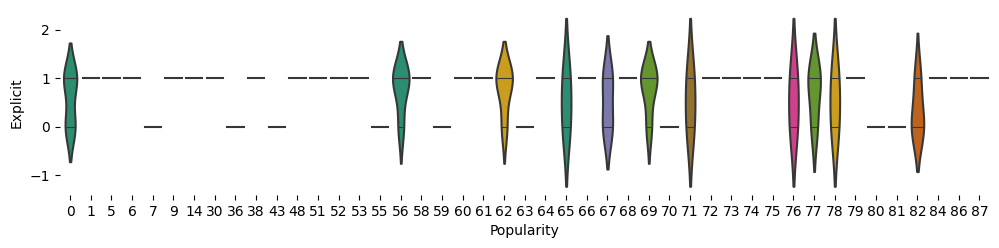

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_track_info['Explicit'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_track_info, x='Popularity', y='Explicit', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [12]:
# get most popular artist
average_popularity_by_artist = df_track_info.groupby("Artists")["Popularity"].mean().reset_index()
average_popularity_by_artist = average_popularity_by_artist.sort_values(by="Popularity", ascending=False)
df_pop = average_popularity_by_artist[:5]
df_un_pop = average_popularity_by_artist.tail(5)

In [13]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from dash import dash_table
from pyngrok import ngrok

# color ids to mimic spotify
spotify_black = "#191414"
neon_green = "#1DB954"
white = 'white'

# input image url
image_url = '51rttY7a+9L.png'
with open(image_url, 'rb') as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('ascii')


# create plot(s)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_track_new['Track Name'], y=df_track_new['Popularity'], mode='lines', line=dict(color=neon_green)))
fig.update_layout(
    xaxis_title="Track Name",
    yaxis_title="Popularity",
    title="Playlist Popularity Trends",
    title_font=dict(family="Circular, sans-serif", size=24, color=white),
    xaxis=dict(title_font=dict(family="Circular, sans-serif", size=18, color=white)),
    yaxis=dict(title_font=dict(family="Circular, sans-serif", size=18, color=white)),
    plot_bgcolor=spotify_black,
    paper_bgcolor=spotify_black,
    font=dict(family="Circular, sans-serif", size=12, color=white)
)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_track_new['Track Name'], y=df_track_new['Danceability'], mode='lines', line=dict(color=neon_green)))
fig1.update_layout(
    xaxis_title="Track Name",
    yaxis_title="Danceability",
    title="Playlist Danceablity Trends",
    title_font=dict(family="Circular, sans-serif", size=24, color=white),
    xaxis=dict(title_font=dict(family="Circular, sans-serif", size=18, color=white)),
    yaxis=dict(title_font=dict(family="Circular, sans-serif", size=18, color=white)),
    plot_bgcolor=spotify_black,
    paper_bgcolor=spotify_black,
    font=dict(family="Circular, sans-serif", size=12, color=white)
)
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df_track_new['Track Name'], y=df_track_new['Energy'], mode='lines', line=dict(color=neon_green)))
fig2.update_layout(
    xaxis_title="Track Name",
    yaxis_title="Energy",
    title="Playlist Energy Trends",
    title_font=dict(family="Circular, sans-serif", size=24, color=white),
    xaxis=dict(title_font=dict(family="Circular, sans-serif", size=18, color=white)),
    yaxis=dict(title_font=dict(family="Circular, sans-serif", size=18, color=white)),
    plot_bgcolor=spotify_black,
    paper_bgcolor=spotify_black,
    font=dict(family="Circular, sans-serif", size=12, color=white)
)

# init the dash
app = dash.Dash(__name__)
data_table = dash_table.DataTable(
    id='data_table',
    columns=[{"name": col, "id": col} for col in hybrid_recommendations_df.columns],
    data=hybrid_recommendations_df.to_dict('records'),
    style_table={'overflowX': 'auto', 'margin': '20px'},
    style_cell={
        'textAlign': 'left',
        'backgroundColor': spotify_black,
        'color': white,
        'border': '1px solid white',
        'font-family': 'Circular, sans-serif'
    },
    style_header={
        'backgroundColor': neon_green,
        'fontWeight': 'bold',
        'color': 'white',
        'font-family': 'Circular, sans-serif',
    },
)

dash_table_pop = dash_table.DataTable(
    id='data_table_pop',
    columns=[{"name":col, "id":col} for col in df_pop],
    data=df_pop.to_dict('records'),
    style_table={'overflowX': 'auto', 'margin': '20px'},
    style_cell={
        'textAlign': 'left',
        'backgroundColor': spotify_black,
        'color': white,
        'border': '1px solid white',
        'font-family': 'Circular, sans-serif'
    },
    style_header={
        'backgroundColor': neon_green,
        'fontWeight': 'bold',
        'color': 'white',
        'font-family': 'Circular, sans-serif',
    },
)

dash_table_un_pop = dash_table.DataTable(
    id='data_table_un_pop',
    columns=[{"name":col, "id":col} for col in df_un_pop],
    data=df_un_pop.to_dict('records'),
    style_table={'overflowX': 'auto', 'margin': '20px'},
    style_cell={
        'textAlign': 'left',
        'backgroundColor': spotify_black,
        'color': white,
        'border': '1px solid white',
        'font-family': 'Circular, sans-serif'
    },
    style_header={
        'backgroundColor': neon_green,
        'fontWeight': 'bold',
        'color': 'white',
        'font-family': 'Circular, sans-serif',
    },
)
# Define the layout
app.layout = html.Div(children=[
    html.Div(
        children=[
            html.H1("Your Dashboard", style={'font-family': 'Circular, sans-serif', 'font-size': '70px', 'color': 'white'}),
            html.Img(src=f'data:image/png;base64,{encoded_image}', style={'width': '50px', 'height': '50px'}),
        ],
        style={'display': 'flex', 'align-items': 'center'}
    ),
    dcc.Graph(id='Popularity Plot', figure=fig),
    dcc.Graph(id='Danceability Plot', figure=fig1),
    dcc.Graph(id='Energy Plot', figure=fig2),
    html.H2("Your Personalized Recommendations", style={'font-family':'Circular, sans-serif' , 'color': 'white'}),
    data_table,
    html.H2("Your Most Popular Artists", style={'font-family':'Circular, sans-serif' , 'color': 'white'}),
    dash_table_pop,
    html.H2("Your UnderGround Artists", style={'font-family':'Circular, sans-serif' , 'color': 'white'}),
    dash_table_un_pop,
])

# run app
if __name__ == '__main__':
    app.run_server(host='127.0.0.1', port=8050, debug=True, open_browser=True)

<IPython.core.display.Javascript object>